In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [ ]:
m = x_train.shape[0]
m

2

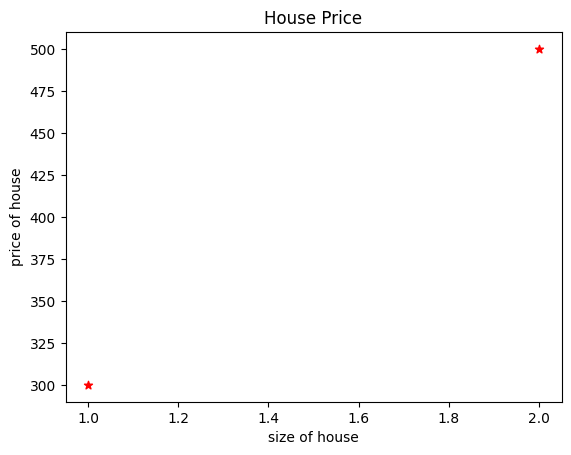

In [ ]:
plt.scatter(x_train, y_train, marker = '*', color = 'r')
plt.title('House Price')
plt.xlabel('size of house')
plt.ylabel('price of house')
plt.show()

In [ ]:
w = 200
b = 100
print(f"value of w : {w}")
print(f"value of b : {b}")

value of w : 200
value of b : 100


In [ ]:
# y = wx + b; y = f(x)
def LinearRegression(x_train, w, b) :
  m = x_train.shape[0]
  fwb = np.zeros(m)

  for i in range(m) :
    fwb[i] = w * x_train[i] + b

  return fwb

In [ ]:
y_pred = LinearRegression(x_train, w, b)
y_pred

array([300., 500.])

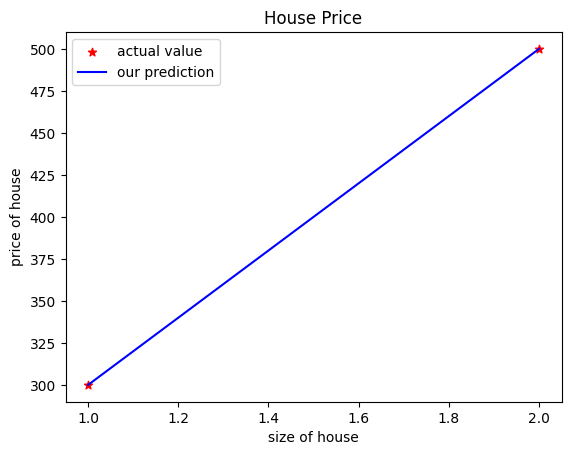

In [ ]:
plt.scatter(x_train, y_train, marker = '*', color = 'r', label = 'actual value')
plt.plot(x_train, y_pred, color = 'b', label = 'our prediction')
plt.title('House Price')
plt.xlabel('size of house')
plt.ylabel('price of house')
plt.legend()
plt.show()

In [ ]:
# J(w, b) = 1/2m * sum (pred - y)**2
def cost_function(x_train, y_train, w, b) :
  m = x_train.shape[0] #recupere le nombre des lignes m = 2
  cost_sum = 0

  for i in range(m) :
    #fwb la valeur est recalculer a chaque iteration
    fwb = w * x_train[i] + b # when i = 0 : 200 * 1.0 + 100 = 300 | i = 1 : 200 * 2.0 + 100 = 500
    cost = (fwb - y_train[i]) ** 2  # 300 - 300(la vrais valeur) = "0" | 500 - 500 = "0"
    cost_sum = cost_sum + cost # 0 + 0 = 0
  total_cost = (1/ (2 * m)) * cost_sum

  return total_cost

In [ ]:
j = cost_function(x_train, y_train, w, b)
j

0.0

In [ ]:
w_values = np.linspace(0, 400, 100)
j_w = [cost_function(x_train, y_train, w, b)  for w in w_values]

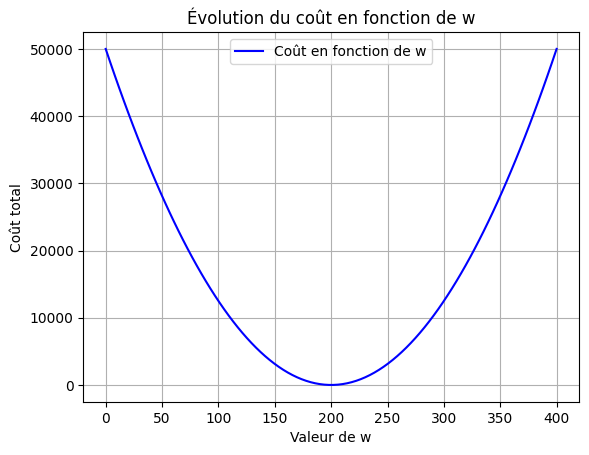

In [ ]:
plt.plot(w_values, j_w, label="Coût en fonction de w", color="b")
plt.xlabel("Valeur de w")
plt.ylabel("Coût total")
plt.title("Évolution du coût en fonction de w")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# L'algorithm de la descente de gradient nous aide a determiner le parametre w enfin de minimiser la fonction cout
# Sans descente de gradient : On doit tester manuellement plusieurs 𝑤
# Avec descente de gradient : L’algorithme trouve le bon 𝑤

# POURQUOI LA DESCENTE DE GRADIENT :
#✅ Automatique → Il trouve la meilleure valeur de w sans qu'on ait à tester plusieurs valeurs.
#✅ Efficace → Fonctionne même si on a beaucoup de données.
#✅ Flexible → S'adapte à différentes formes de datasets.

In [ ]:
# if the learning rate is too small the gradien descent will work but it will be too small (take too much time)
# if the learning rate is too large the gradien descent may oversheet, never reach the minimum (Fail to converge ) diverge

In [ ]:
import math
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [ ]:
def cost_function(x_train, y_train, w, b) :
  m = x_train.shape[0]
  cost_sum = 0

  for i in range(m) :
    fwb = w * x_train[i] + b
    cost = (fwb - y_train[i]) ** 2
    cost_sum = cost_sum + cost
  total_cost = (1 / (m * 2)) * cost_sum

  return total_cost

In [ ]:
# This function calculates the gradients (derivatives) of the cost function with respect to w and b
# These gradients tell us how much we need to adjust w and b to reduce the cost.
def compute_gradient(x_train, y_train, w, b) :
  m = x_train.shape[0]
  dj_dw = 0 # Gradient of J with respect to w
  dj_db = 0 # Gradient of J with respect to b

  for i in range(m) :
    fwb = w * x_train[i] + b  # Compute prediction f_wb(x) = w * x + b
    dj_dw_i = (fwb - y_train[i]) * x_train[i]
    dj_db_i = (fwb - y_train[i])

    dj_dw = dj_dw + dj_dw_i  # Accumulate sum for w
    dj_db = dj_dw + dj_db_i  # Accumulate sum for b

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db


In [ ]:
#This function uses the gradients from compute_gradient to update w and 𝑏 iteratively, so they move towards their optimal values.
def gradient_descent(x_train, y_train, w_initial, b_initial, alpha, num_iters, cost_function, compute_gradient) :

  # Gradient function (compute_gradient) to find how much w and b should be adjusted.
  # Cost function (cost_function) to compute the error
  # alpha: This is the learning rate, which controls how big the steps are during the descent.
  # num_iters: This is the number of iterations (steps) the algorithm will take to update  w and b
  # w_initial and b_initial: These are the starting values for the parameters w and b

  J_history = [] # Stores cost function values at each iteration . helps us track how the cost decreases over time.
  p_history = [] # Stores (w, b) values at each iteration
  b = b_initial
  w = w_initial

  for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)  # Get gradients

        # Update Parameters w and b using descent gradiant formula to reduce the cost j(w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x_train, y_train, w, b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0: # print every 100 iterations
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
  return w, b, J_history, p_history #return w and J,w history for graphing

In [ ]:
# initialize parameters
w_initial = 0
b_initial = 0
# some gradient descent settings
num_iters = 10000
alpha = 0.01
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_initial, b_initial, alpha, num_iters, cost_function, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.74e+04  dj_dw: -6.500e+02, dj_db: -9.000e+02   w:  6.500e+00, b: 9.00000e+00
Iteration 1000: Cost 1.40e+03  dj_dw:  5.379e+00, dj_db: -9.162e+00   w:  1.019e+02, b: 2.67010e+02
Iteration 2000: Cost 4.20e+03  dj_dw:  9.311e+00, dj_db: -1.586e+01   w:  3.027e+01, b: 3.89098e+02
Iteration 3000: Cost 1.26e+04  dj_dw:  1.612e+01, dj_db: -2.745e+01   w: -9.381e+01, b: 6.00435e+02
Iteration 4000: Cost 3.77e+04  dj_dw:  2.790e+01, dj_db: -4.752e+01   w: -3.086e+02, b: 9.66263e+02
Iteration 5000: Cost 1.13e+05  dj_dw:  4.829e+01, dj_db: -8.226e+01   w: -6.804e+02, b: 1.59952e+03
Iteration 6000: Cost 3.38e+05  dj_dw:  8.360e+01, dj_db: -1.424e+02   w: -1.324e+03, b: 2.69569e+03
Iteration 7000: Cost 1.01e+06  dj_dw:  1.447e+02, dj_db: -2.465e+02   w: -2.438e+03, b: 4.59320e+03
Iteration 8000: Cost 3.04e+06  dj_dw:  2.505e+02, dj_db: -4.267e+02   w: -4.366e+03, b: 7.87781e+03
Iteration 9000: Cost 9.10e+06  dj_dw:  4.336e+02, dj_db: -7.386e+02   w: -7.705e+03, b: 1.35635e+04


##In order to check if our gradient descent work correctly

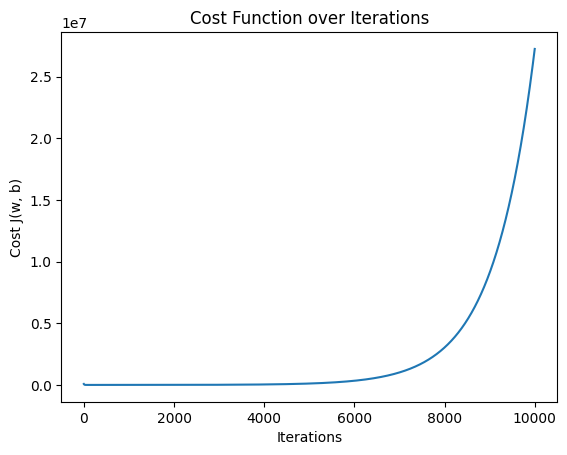

In [ ]:
# The cost function J(w,b) should decrease and stabilize.
plt.plot(J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost J(w, b)')
plt.title('Cost Function over Iterations')
plt.show()

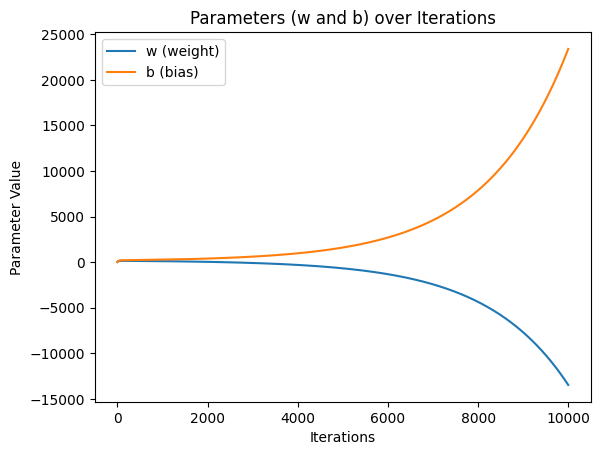

In [ ]:
# check w and b converge  : The parameters w and b should stabilize (stop changing significantly) as the algorithm progresses.
w_history = [p[0] for p in p_hist] # Value of w at iteration i
b_history = [p[1] for p in p_hist] # Value of b at iteration i

plt.plot(w_history, label='w (weight)')
plt.plot(b_history, label='b (bias)')
plt.xlabel('Iterations')
plt.ylabel('Parameter Value')
plt.title('Parameters (w and b) over Iterations')
plt.legend()
plt.show()

In [ ]:
print(f"value of w : {w}")
print(f"value of b : {b}")

value of w : 200
value of b : 100


In [ ]:
# Verify the Final Model Predictions

w_final, b_final = w, b # Final values of w and b

# Compute predictions
y_pred = w_final * x_train + b_final

# Compare predictions with actual values
for i in range(len(x_train)):
    print(f"x = {x_train[i]}, y_actual = {y_train[i]}, y_pred = {y_pred[i]}")

x = 1.0, y_actual = 300.0, y_pred = 300.0
x = 2.0, y_actual = 500.0, y_pred = 500.0
